# Homework 3 Questions

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

df_2024 = pd.read_csv('Dataset Generation (2024) (Responses) - Form Responses 1.csv')
df_fardina = pd.read_csv('Dataset Generation (Fardina) (Responses) - Form Responses 1.csv')
df_max = pd.read_csv('Dataset Generation (Max) (Responses) - Form Responses 1.csv')

Data cleaning:

In [88]:
df_2024.drop_duplicates(inplace=True)
df_fardina.drop_duplicates(inplace=True)
df_max.drop_duplicates(inplace=True)

df_2024.dropna(inplace=True)
df_fardina.dropna(inplace=True)
df_max.dropna(inplace=True)

short_cols = ['Time', 'Year', 'Age', 'Politics of Parents', 'Politics of Self', 'Spirituality', 'Gender', 'Q1: Ignored Knee Pain', 'Q2: Rejected Aisle Walk', 'Q3: Trust Fund Split 50/50', 'Q4: Schooling Seperate Finances', 'Q5: Lost Cat, No Reward', 'Q6: Surprisig Child Drop-Off', 'Q7: Business Class Over Kids', 'Q8: Single Parent, Four Kids', 'Q9: Split Spouse Child Support', 'Q10: Expensive School, Cheap Career', 'Q11: Ex Wedding Invitation Revoked', 'Q12: Relatives Unapprove Wedding', 'Q13: Pregnant Wife, No Drinks', 'Q14: Rejected Dyed Hair']  

if 'Would you describe yourself as compassionate?' in df_fardina.columns:
    del df_fardina['Would you describe yourself as compassionate?']

fardina_cols = df_fardina.columns.to_list()
max_cols = df_max.columns.to_list()
fardina_col_mapping = dict(zip(fardina_cols, short_cols))
max_col_mapping = dict(zip(max_cols, short_cols))

df_fardina_final = df_fardina.rename(columns=fardina_col_mapping)
df_max_final = df_max.rename(columns=max_col_mapping)

df_2023_final = pd.concat([df_fardina_final, df_max_final])
df_2023_final['Gender'] = df_2023_final['Gender'].apply(func=lambda s: s.replace('Famale', 'Female') if isinstance(s, str) else s)

str_replace = lambda s: s.replace('religious', 'spiritual') if isinstance(s, str) else s
df_2024['How would you rate your religiousness?'] = df_2024['How would you rate your religiousness?'].apply(func=str_replace)

d2024_cols = df_2024.columns.to_list()
d2024_col_mapping = dict(zip(d2024_cols, short_cols))
df_2024_final = df_2024.rename(columns=d2024_col_mapping)

df_all = pd.concat([df_2023_final, df_2024_final])

1. Create a graph telling a story about students political beliefs vs. their parents.

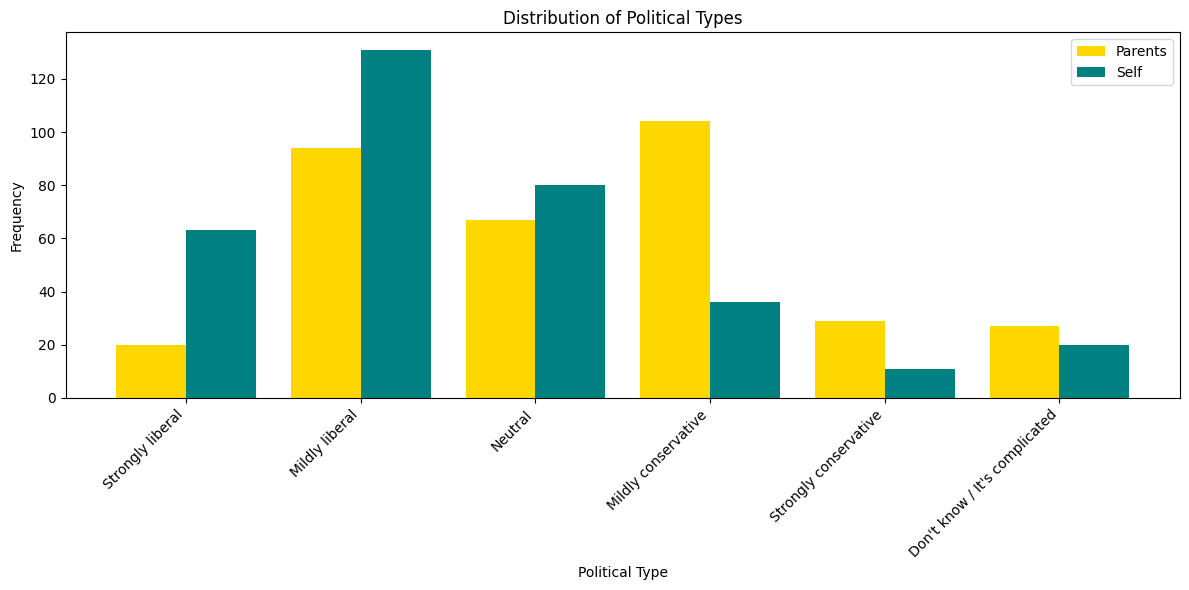

In [95]:
political_order = ['Strongly liberal', 'Mildly liberal', 'Neutral', 'Mildly conservative', 'Strongly conservative', 'Don\'t know / It\'s complicated']

# Convert the columns to categorical types with the defined order
df_all['Politics of Parents'] = pd.Categorical(df_all['Politics of Parents'], categories=political_order, ordered=True)
df_all['Politics of Self'] = pd.Categorical(df_all['Politics of Self'], categories=political_order, ordered=True)

# Get the value counts for both 'PoliticalTypeOfParents' and 'PoliticalTypeOfSelf'
parents_counts = df_all['Politics of Parents'].value_counts(sort=False)
self_counts = df_all['Politics of Self'].value_counts(sort=False)

# Set up the figure
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Define the positions for the groups
index = np.arange(len(political_order))

# Plot bars 
plt.bar(index - bar_width/2, parents_counts, bar_width, label='Parents', color='gold')
plt.bar(index + bar_width/2, self_counts, bar_width, label='Self', color='teal')

# Customize the plot
plt.xticks(index, political_order, rotation=45, ha='right')
plt.xlabel('Political Type')
plt.ylabel('Frequency')
plt.title('Distribution of Political Types')
plt.legend()
plt.tight_layout()

plt.show()

2. Show the percent of each answer for the political beliefs over all the respondants (so the percent of liberals, conservatives, etc).

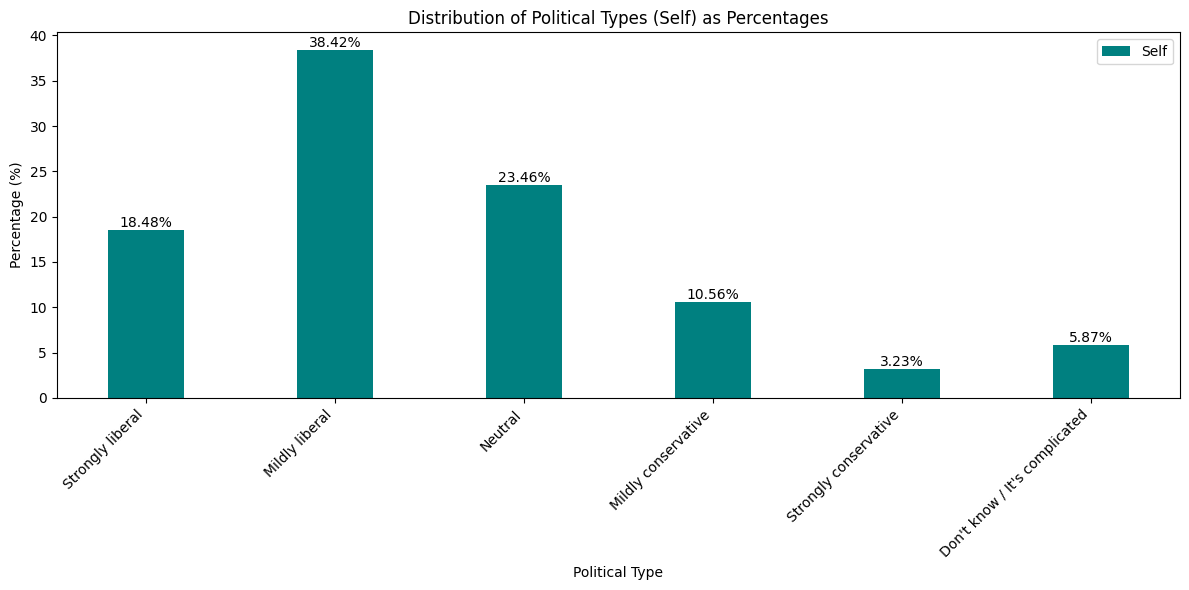

In [96]:
val_dict = df_all['Politics of Self'].value_counts().to_dict()
val_tot = sum(val_dict.values())

for key, val in val_dict.items():
    val_dict[key] = round(val / val_tot, 4) * 100

# Set up the figure
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Define the positions for the groups
index = np.arange(len(political_order))

# Plot bars with percentages for "Politics of Self"
self_percentages = [val_dict.get(category, 0) for category in political_order] 

bars = plt.bar(index, self_percentages, bar_width, label='Self', color='teal')

# Customize the plot
plt.xticks(index, political_order, rotation=45, ha='right')
plt.xlabel('Political Type')
plt.ylabel('Percentage (%)')  # Updated label to indicate percentages
plt.title('Distribution of Political Types (Self) as Percentages')
plt.legend()

# Add percentages on top of each bar
for bar, percentage in zip(bars, self_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')
    
plt.tight_layout()

# Show the plot
plt.show()

3. Does the priming question have a statistically significant effect on any questions? If so, which ones?

Your answer here:

In [ ]:
# Code for answer

4. Does swapping genders have a stastically significant effect on any questions? If so, which ones?

Your answer here:

In [7]:
contingency_tables_2024 = []
contingency_tables_2023 = []

for i in range(7, len(short_cols[7:])+7):
    contingency_tables_2024.append(pd.crosstab(df_2024_final['Gender'], df_2024_final[short_cols[i]]))
    contingency_tables_2023.append(pd.crosstab(df_2023_final['Gender'], df_2023_final[short_cols[i]]))


i = 1
for ct in contingency_tables_2024:
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Q{i}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i+=1

print('-' for _ in range(20))

i = 1
for ct in contingency_tables_2023:
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Q{i}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i+=1

Q1	|	Chi-square statistic: 1.7982907018154106, p-value: 0.9372837193138461, Degrees of freedom: 6
Q2	|	Chi-square statistic: 2.8576218403346068, p-value: 0.8264929653218223, Degrees of freedom: 6
Q3	|	Chi-square statistic: 13.156640903222936, p-value: 0.04061482735470764, Degrees of freedom: 6
Q4	|	Chi-square statistic: 7.4929549114331735, p-value: 0.27765140714750947, Degrees of freedom: 6
Q5	|	Chi-square statistic: 3.627333955612896, p-value: 0.7269585751700238, Degrees of freedom: 6
Q6	|	Chi-square statistic: 3.8647121112228153, p-value: 0.694978541437776, Degrees of freedom: 6
Q7	|	Chi-square statistic: 4.583129897003092, p-value: 0.5982768929532176, Degrees of freedom: 6
Q8	|	Chi-square statistic: 8.053149589607921, p-value: 0.23423524285604283, Degrees of freedom: 6
Q9	|	Chi-square statistic: 3.789509631012899, p-value: 0.7051362039791187, Degrees of freedom: 6
Q10	|	Chi-square statistic: 4.410032242063492, p-value: 0.621369017985423, Degrees of freedom: 6
Q11	|	Chi-square statis

5. What hour of the day were most of the surveys completed?

Your answer here:

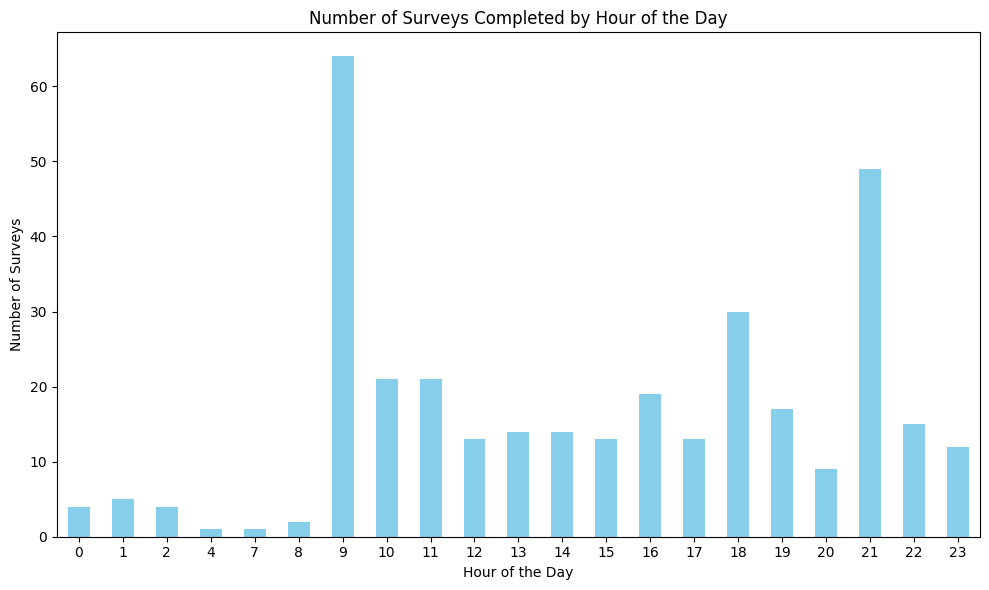

In [97]:
df_time = pd.DataFrame()
df_all['Time'] = pd.to_datetime(df_all['Time'])
df_time['Hour'] = df_all['Time'].dt.hour
hour_counts = df_time['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Surveys Completed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Surveys')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

6. Which two questions in this semester's data have the most correlated answer?

Your answer:

In [122]:
category_mapping = {
    'Strongly a jerk': 2,
    'Middle a jerk': 1,
    'Not a jerk': 0
}

df_corr = pd.DataFrame()
for col in short_cols[7:]:
    df_corr[col + '_numeric'] = df_all[col].map(category_mapping)

corr_matrix = df_corr.corr()

corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr_value = corr_matrix_upper.max().max() 
max_corr_indices = corr_matrix_upper.stack().idxmax()

print(f"The two questions with the highest covariance are: {max_corr_indices[0]} and {max_corr_indices[1]} with a covariance of {max_corr_value}.")

The two questions with the highest covariance are: Q7: Business Class Over Kids_numeric and Q13: Pregnant Wife, No Drinks_numeric with a covariance of 0.43157285647151983.


7. Which two questions this semseter had the highest covariance?

Your answer:

In [121]:
category_mapping = {
    'Strongly a jerk': 2,
    'Middle a jerk': 1,
    'Not a jerk': 0
}

df_cov = pd.DataFrame()
for col in short_cols[7:]:
    df_cov[col + '_numeric'] = df_all[col].map(category_mapping)

cov_matrix = df_cov.cov()

cov_matrix_upper = cov_matrix.where(np.triu(np.ones(cov_matrix.shape), k=1).astype(bool))
max_cov_value = cov_matrix_upper.max().max() 
max_cov_indices = cov_matrix_upper.stack().idxmax()

print(f"The two questions with the highest covariance are: {max_cov_indices[0]} and {max_cov_indices[1]} with a covariance of {max_cov_value}.")

The two questions with the highest covariance are: Q7: Business Class Over Kids_numeric and Q13: Pregnant Wife, No Drinks_numeric with a covariance of 0.31066887783305674.


8. Which question this semseter was most strongly influenced by respondants religious views?

Your answer:

In [102]:
ct_religious = []

for i in range(7, len(short_cols[7:]) + 7):
    ct_religious.append(pd.crosstab(df_all['Spirituality'], df_all[short_cols[i]]))

i = 1
for ct in ct_religious:
    chi2, p, dof, expected = chi2_contingency(ct)        
    print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1

Q1	|	Insignificant	|	Chi-square statistic: 3.2630222861029337, p-value: 0.5148123144196646, Degrees of freedom: 4
Q2	|	Insignificant	|	Chi-square statistic: 2.032092137361748, p-value: 0.7298561148555551, Degrees of freedom: 4
Q3	|	Insignificant	|	Chi-square statistic: 7.167057323349682, p-value: 0.12731900264554913, Degrees of freedom: 4
Q4	|	Insignificant	|	Chi-square statistic: 2.1369658008477406, p-value: 0.7105844630439528, Degrees of freedom: 4
Q5	|	Insignificant	|	Chi-square statistic: 1.2441041530767567, p-value: 0.8707851396069879, Degrees of freedom: 4
Q6	|	Significant	|	Chi-square statistic: 14.425630587830558, p-value: 0.0060534948117176674, Degrees of freedom: 4
Q7	|	Significant	|	Chi-square statistic: 24.077530316078484, p-value: 7.706677512574947e-05, Degrees of freedom: 4
Q8	|	Insignificant	|	Chi-square statistic: 1.6330856086487873, p-value: 0.8028337137418244, Degrees of freedom: 4
Q9	|	Insignificant	|	Chi-square statistic: 1.7285667178667885, p-value: 0.7855221385755

9. Are there any questions where graduate students had a stastically signifant difference from undergraduate students? If so, which ones?

Your answer:

In [101]:
df_year_bins = pd.DataFrame()
df_year_bins = pd.concat([df_all['Year'], df_all[short_cols[7:]]], axis=1)

# Corrected function with return statements
def categorize_type_of_year(year):
    if year == 'Graduate Student':
        return 'Graduate'  # Return the string
    else:
        return 'Undergraduate'  # Return the string

# Apply the function correctly
df_year_bins['Year Bin'] = df_year_bins['Year'].apply(func=categorize_type_of_year)

ct_year_bins = []

# Assuming short_cols is defined and has the right columns
for i in range(7, len(short_cols[7:]) + 7):
    ct_year_bins.append(pd.crosstab(df_year_bins['Year Bin'], df_year_bins[short_cols[i]]))

i = 1
for ct in ct_year_bins:
    chi2, p, dof, expected = chi2_contingency(ct)        
    print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    i += 1


Q1	|	Significant	|	Chi-square statistic: 6.247886376383307, p-value: 0.04398339123783709, Degrees of freedom: 2
Q2	|	Insignificant	|	Chi-square statistic: 3.277555835495651, p-value: 0.19421724677002197, Degrees of freedom: 2
Q3	|	Insignificant	|	Chi-square statistic: 5.1691972186302655, p-value: 0.07542634895966804, Degrees of freedom: 2
Q4	|	Insignificant	|	Chi-square statistic: 3.3727638783218485, p-value: 0.18518833602852783, Degrees of freedom: 2
Q5	|	Insignificant	|	Chi-square statistic: 4.176293082134202, p-value: 0.12391659742736635, Degrees of freedom: 2
Q6	|	Insignificant	|	Chi-square statistic: 0.6718358051676628, p-value: 0.71468177693492, Degrees of freedom: 2
Q7	|	Insignificant	|	Chi-square statistic: 0.12074093589529472, p-value: 0.9414157046292878, Degrees of freedom: 2
Q8	|	Significant	|	Chi-square statistic: 9.55244150547317, p-value: 0.008427789558026163, Degrees of freedom: 2
Q9	|	Insignificant	|	Chi-square statistic: 1.0442777469009885, p-value: 0.5932503026855827,

10. Bin the responses by morning, afternoon, evening and night. Do these catagories have a statistically significant effect on any questions? If so, which ones?

Your answer:

In [68]:
df_time_bins = pd.DataFrame()
df_time_bins = pd.concat([df_all['Time'], df_all[short_cols[7:]]], axis=1)

df_time_bins['Time'] = pd.to_datetime(df_time_bins['Time'])
df_time_bins['Hour'] = df_time_bins['Time'].dt.hour
df_time_bins['Minute'] = df_time_bins['Time'].dt.minute
df_time_bins['Second'] = df_time_bins['Time'].dt.second

def categorize_time_of_day(hour, minute, second):
    time_tuple = (hour, minute, second)

    if (6, 0, 0) <= time_tuple <= (11, 59, 59):
        return 'Morning'
    elif (12, 0, 0) <= time_tuple <= (16, 59, 59):
        return 'Afternoon'
    elif (17, 0, 0) <= time_tuple <= (21, 59, 59):
        return 'Evening'
    else:
        return 'Night'

df_time_bins['Time of Day'] = df_time_bins.apply(lambda row: categorize_time_of_day(row['Hour'], row['Minute'], row['Second']), axis=1)


ct_time_bins = []

for i in range(7, len(short_cols[7:])+7):
    ct_time_bins.append(pd.crosstab(df_time_bins['Time of Day'], df_time_bins[short_cols[i]]))

i = 1
for ct in ct_time_bins:
    chi2, p, dof, expected = chi2_contingency(ct)        
    print(f"Q{i}\t|\t{'Significant' if p < float(0.05) else 'Insignificant'}\t|\tChi-square statistic: {chi2}, p-value: {p}, Degrees of freedom:  {dof}")
    i += 1


Q1	|	Insignificant	|	Chi-square statistic: 7.22641027778476, p-value: 0.30041563094450197, Degrees of freedom:  6
Q2	|	Insignificant	|	Chi-square statistic: 2.111882428954207, p-value: 0.9091264170956358, Degrees of freedom:  6
Q3	|	Insignificant	|	Chi-square statistic: 11.15740004444546, p-value: 0.0836319178359346, Degrees of freedom:  6
Q4	|	Significant	|	Chi-square statistic: 19.473159222404256, p-value: 0.0034348703497471393, Degrees of freedom:  6
Q5	|	Significant	|	Chi-square statistic: 14.839368199428137, p-value: 0.021543544214542354, Degrees of freedom:  6
Q6	|	Significant	|	Chi-square statistic: 18.053592937475376, p-value: 0.006099650176253737, Degrees of freedom:  6
Q7	|	Insignificant	|	Chi-square statistic: 7.946720037086894, p-value: 0.24203278592148864, Degrees of freedom:  6
Q8	|	Significant	|	Chi-square statistic: 17.371006406072414, p-value: 0.008012228560283824, Degrees of freedom:  6
Q9	|	Insignificant	|	Chi-square statistic: 4.999954340830056, p-value: 0.543818972

In [76]:
df_year_bins

,Year,Q1: Ignored Knee Pain,Q2: Rejected Aisle Walk,Q3: Trust Fund Split 50/50,Q4: Schooling Seperate Finances,"Q5: Lost Cat, No Reward",Q6: Surprisig Child Drop-Off,Q7: Business Class Over Kids,"Q8: Single Parent, Four Kids",Q9: Split Spouse Child Support,"Q10: Expensive School, Cheap Career",Q11: Ex Wedding Invitation Revoked,Q12: Relatives Unapprove Wedding,"Q13: Pregnant Wife, No Drinks",Q14: Rejected Dyed Hair,Year Bin
0,Junior,Strongly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,None
1,Junior,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,None
2,Junior,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,None
3,Senior,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,None
5,Other,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Graduate Student,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,None
126,Junior,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,None
127,Senior,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,None
128,Graduate Student,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,None
